<a href="https://colab.research.google.com/github/utper/Capstone/blob/master/dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 14ms/step - accuracy: 0.8422 - loss: 0.5029 - val_accuracy: 0.9536 - val_loss: 0.1491
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 12ms/step - accuracy: 0.9536 - loss: 0.1601 - val_accuracy: 0.9711 - val_loss: 0.0932
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 12ms/step - accuracy: 0.9658 - loss: 0.1177 - val_accuracy: 0.9738 - val_loss: 0.0894
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9708 - loss: 0.0999 - val_accuracy: 0.9750 - val_loss: 0.0830
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 11ms/step - accuracy: 0.9741 - loss: 0.0862 - val_accuracy: 0.9785 - val_loss: 0.0751
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9774 - loss: 0.0752 - val_accuracy: 0.9801 - val_loss: 0.0692
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9793 - loss: 0.0745 - val_accuracy: 0.9796 - val_loss: 0.0810
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9817 -

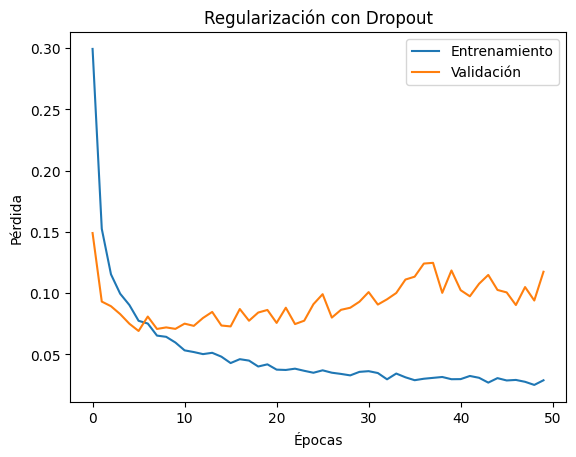

In [2]:
# Dropout es una técnica efectiva para reducir el sobreajuste (overfitting). Funciona desactivando aleatoriamente algunas neuronas en cada
# paso de entrenamiento, lo que obliga al modelo a no depender demasiado de ciertas características.
# Aquí está la versión mejorada de nuestro modelo con Dropout:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np

# Cargar dataset MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalización

# Modelo con Dropout para reducir el sobreajuste
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.3),  # Apaga aleatoriamente el 30% de las neuronas
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')  # Capa de salida
])

# Compilar modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar modelo con validación
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test))

# Graficar pérdida en entrenamiento y validación
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Regularización con Dropout')
plt.show()

# 🔹 ¿Qué cambia en esta versión?
# * Se agregaron capas Dropout después de cada capa densa para evitar que el modelo dependa demasiado de ciertas neuronas.
# * Cada Dropout(0.3) apaga aleatoriamente el 30% de las neuronas en cada paso de entrenamiento.
# * Esto fuerza al modelo a aprender representaciones más generalizables, reduciendo el sobreajuste.
# * 🔍 ¿Qué deberías notar en la gráfica? Idealmente, la pérdida en validación no crecerá tanto como antes, lo que indica que el modelo
#   generaliza mejor en datos no vistos.
